# Setting up Mlflow

In [ ]:
# Install the following librairies (it is better to create a venv (or conda) virtual environment first and install these librairies in it).
!pip install mlflow
!pip install --upgrade jinja2
!pip install --upgrade Flask
!pip install setuptools
import pandas as pd
import numpy as np

  Using cached alembic-1.17.0-py3-none-any.whl.metadata (7.2 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached matplotlib-3.10.7-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached pyarrow-21.0.0-cp311-cp311-win_amd64.whl.metadata (3.4 kB)
  Using cached scikit_learn-1.7.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached sqlalchemy-2.0.44-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
  Using cached waitress-3.0.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached fastapi-0.119.0-py3-none-any.whl.metadata (28 kB)
  Using cached gitpython-3.1.45-py3-none-any.whl.metadata (13 kB)
  Using cached importlib_metadata-8.7.0-py3-none-any.whl.metadata (4.8 kB)
     ---------------------------------------- 0.0/87.7 kB ? eta -:--:--
     ---- -------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:

# starts an MLflow server locally.
!mlflow server --host 127.0.0.1 --port 8080


^C


## Using the MLflow Client API


- Initiate a new Experiment.

- Start Runs within an Experiment.

- Document parameters, metrics, and tags for your Runs.

- Log artifacts linked to runs, such as models, tables, plots, and more.



In [2]:
from mlflow import MlflowClient
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
!pip install catboost
!pip install xgboost
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

  Using cached catboost-1.2.8-cp311-cp311-win_amd64.whl.metadata (1.5 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached plotly-6.3.1-py3-none-any.whl.metadata (8.5 kB)
Using cached catboost-1.2.8-cp311-cp311-win_amd64.whl (102.5 MB)
Using cached graphviz-0.21-py3-none-any.whl (47 kB)
Using cached plotly-6.3.1-py3-none-any.whl (9.8 MB)
   ---------------------------------------- 0.0/415.9 kB ? eta -:--:--
    --------------------------------------- 10.2/415.9 kB ? eta -:--:--
   -- ------------------------------------ 30.7/415.9 kB 660.6 kB/s eta 0:00:01
   --------- ---------------------------- 102.4/415.9 kB 845.5 kB/s eta 0:00:01
   ----------------- ---------------------- 184.3/415.9 kB 1.1 MB/s eta 0:00:01
   ----------------------------- ---------- 307.2/415.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  409.6/415.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 415.9/415.9 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB 640.0 kB/s eta 0:01:53
   ---------------------------------------- 0.0/72.0 MB 487.6 kB/s eta 0:02:28
   ---------------------------------------- 0.1/72.0 MB 655.4 kB/s eta 0:01:50
   ---------------------------------------- 0.2/72.0 MB 1.1 MB/s eta 0:01:07
   ---------------------------------------- 0.3/72.0 MB 1.2 MB/s eta 0:01:01
   ---------------------------------------- 0.3/72.0 MB 1.2 MB/s eta 0:01:01
   ---------------------------------------- 0.3/72.0 MB 1.2 MB/s eta 0:01:01
   ---------------------------------------- 0.3/72.0 MB 1.2 MB/s eta 0:01:01
   ---------------------------------------- 0.3/72.0 MB 1.2 MB/s eta 0:01:01
   ---------------------------------------- 0.3/72.0 MB 1.2 MB/s eta 0:01:01
   ---------------------------------------- 0.3/72.0 MB 1.2 MB/s eta 0:01:01
   ----

In [3]:
# In order to connect to the tracking server, we’ll need to use the uri that we assigned the server when we started it.

client = MlflowClient(tracking_uri="http://127.0.0.1:8080")

#it allows programmatic interaction with the MLflow tracking server.

We now have a client interface to the tracking server that can both send data to and retrieve data from the tracking server.



In [4]:
all_experiments = client.search_experiments()

print(all_experiments)


[<Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1760879013424, experiment_id='0', last_update_time=1760879013424, lifecycle_stage='active', name='Default', tags={'mlflow.experimentKind': 'custom_model_development'}>]


### Importation des données

In [5]:
!pip install -q gdown


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import gdown
import pandas as pd

file_id = "1YrHUOpWLZdA88tOfus6s8CI8XUDqax3x"
url = f"https://drive.google.com/uc?id={file_id}"

filename = "Loan_Data.csv"
gdown.download(url, filename, quiet=False)


df = pd.read_csv(filename)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1YrHUOpWLZdA88tOfus6s8CI8XUDqax3x
To: c:\Users\DELL\Projet_MLOPS\Loan_Data.csv
100%|██████████| 547k/547k [00:00<00:00, 2.16MB/s]


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


### Exploration des données

In [7]:
df.isna().sum()

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [8]:
# Compter le nombre de lignes en double
nombre_de_doublons = df.duplicated().sum()

print(f"Nombre de lignes en double dans le DataFrame : {nombre_de_doublons}")

Nombre de lignes en double dans le DataFrame : 0


In [9]:
df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [13]:
df.shape

(10000, 8)

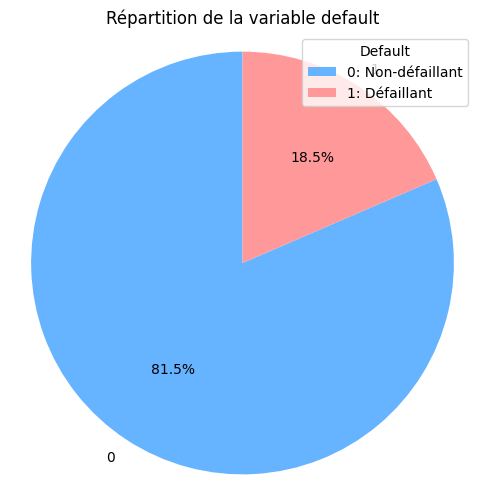

In [ ]:
import matplotlib.pyplot as plt


# Calcule la distribution des valeurs de la colonne 'default'..
default_counts = df['default'].value_counts()

# Crée le graphe circulaire
plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Répartition de la variable default')
plt.legend(title='Default', labels=['0: Non-défaillant', '1: Défaillant'])
plt.axis('equal')  # Pour garder le cercle "rond"
plt.show()


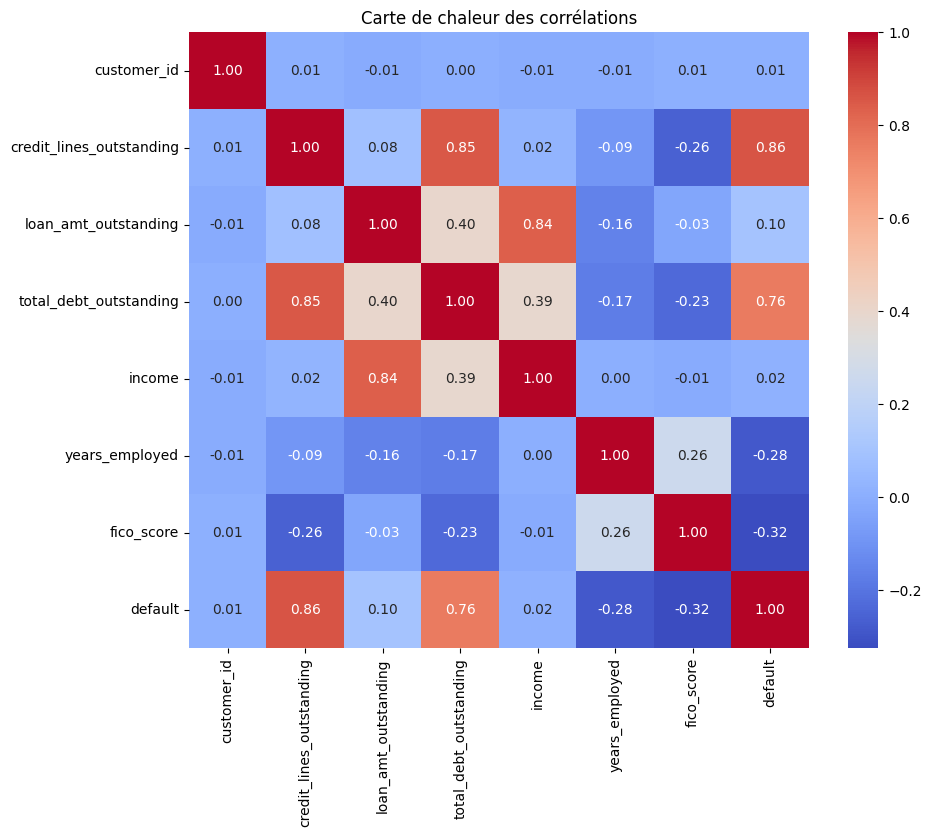

In [13]:
import seaborn as sns


# Calcule la matrice de corrélation
corr = df.corr()

# Affiche la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Carte de chaleur des corrélations')
plt.show()


### create an experiment

In [14]:
# Description détaillée de l'expérience
experiment_description = (
    "Projet de prédiction de défauts de paiements pour prêts personnels en banque de détail. "
    "Le but est de construire un modèle qui estime la probabilité de défaut pour chaque client, "
    "afin d'aider la banque à anticiper les pertes et maintenir la stabilité financière."
)

# Tags pour faciliter la recherche et l'organisation dans MLflow
experiment_tags = {
    "project_name": "credit-default-prediction",
    "sector": "retail-banking",
    "team": "risk-analytics",
    "model_type": "classification",
    "objective": "default probability and expected loss estimation",
    "mlflow.note.content": experiment_description,
}

# Création de l'expérience dans MLflow
credit_default_experiment = client.create_experiment(
    name="Credit_Default_Model", tags=experiment_tags
)

In [15]:
# Recherche des expériences avec le tag project_name = 'credit-default-prediction'
credit_experiments = client.search_experiments(
    filter_string="tags.`project_name` = 'credit-default-prediction'"
)

# Affiche tous les attributs de la première expérience trouvée
print(vars(credit_experiments[0]))

{'_experiment_id': '755341601102114123', '_name': 'Credit_Default_Model', '_artifact_location': 'mlflow-artifacts:/755341601102114123', '_lifecycle_stage': 'active', '_tags': {'mlflow.note.content': "Projet de prédiction de défauts de paiements pour prêts personnels en banque de détail. Le but est de construire un modèle qui estime la probabilité de défaut pour chaque client, afin d'aider la banque à anticiper les pertes et maintenir la stabilité financière.", 'model_type': 'classification', 'objective': 'default probability and expected loss estimation', 'project_name': 'credit-default-prediction', 'sector': 'retail-banking', 'team': 'risk-analytics'}, '_creation_time': 1760882513025, '_last_update_time': 1760882513025}


### Logging our first runs with MLflow

In [16]:
import mlflow
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
# This function call sets the global tracking URI for the current session.
# It’s a convenient way to configure the tracking server URI without creating a separate client instance.

mlflow.set_tracking_uri("http://127.0.0.1:8080")


In [18]:
# Définit l'expérience active sur "Credit_Default_Model" et retourne ses métadonnées
credit_experiment = mlflow.set_experiment("Credit_Default_Model")

# Définit un nom pour ce run spécifique d'entraînement
run_name = "credit_rf_test1"

# Définir un chemin d'artifact pour sauvegarder le modèle
artifact_path = "rf_credit1"


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#### model: random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# 1. Séparation des variables et target (on retire customer_id et la cible default).
X = df.drop(columns=["customer_id", "default"])
y = df["default"]

# 2. Split train/test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Paramètres du modèle
params = {
    "n_estimators": 50,
    "max_depth": 8,
    "min_samples_split": 10,
    "min_samples_leaf": 4,
    "bootstrap": True,
    "oob_score": False,
    "random_state": 888,
}

# 4. Entraînement du modèle de classification
rf = RandomForestClassifier(**params)
rf.fit(X_train, y_train)

# 5. Prédiction des classes et probabilités
y_pred = rf.predict(X_val)
y_pred_proba = rf.predict_proba(X_val)[:, 1]  # Probabilité de défaut (classe 1)

# 6. Calcul des métriques classification
metrics = {
    "accuracy": accuracy_score(y_val, y_pred),
    "precision": precision_score(y_val, y_pred),
    "recall": recall_score(y_val, y_pred),
    "f1": f1_score(y_val, y_pred),
    "auc": roc_auc_score(y_val, y_pred_proba),
}

# 7. MLflow : tracking du run & logging des métriques et du modèle
with mlflow.start_run(run_name=run_name) as run:
    mlflow.log_params(params)
    mlflow.log_metrics(metrics)
    mlflow.sklearn.log_model(
        sk_model=rf, input_example=X_val, artifact_path=artifact_path
    )


2025/10/19 16:02:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
c:\Users\DELL\Projet_MLOPS\myvenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
c:\Users\DELL\Projet_MLOPS\myvenv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains intege

🏃 View run credit_rf_test1 at: http://127.0.0.1:8080/#/experiments/755341601102114123/runs/4cb32b0032674ef5863bb98d61a305ce
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/755341601102114123


#### model: Logistic regression

In [21]:
# Définit l'expérience active sur "Credit_Default_Model" et retourne ses métadonnées
credit_experiment = mlflow.set_experiment("Credit_Default_Model")

# Définit un nom pour ce run spécifique d'entraînement (adapté pour logistic regression)
run_name = "credit_logreg_test1"

# Définir un chemin d'artifact pour sauvegarder le modèle (nom explicite)
artifact_path = "logreg_credit1"


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import mlflow
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Définition de l'expérience dans MLflow
credit_experiment = mlflow.set_experiment("Credit_Default_Model")

# 2. Nom spécifique du run
run_name = "credit_logreg_test1"

# 3. Chemin d’enregistrement de l’artifact du modèle
artifact_path = "logreg_credit1"

# 4. Séparation des features et de la cible
X = df.drop(columns=["customer_id", "default"])
y = df["default"]

# 5. Split train/test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 7. Initialisation du modèle de régression logistique SANS pénalité
params = {
    "penalty": None,        # pas de pénalisation/régularisation
    "solver": "lbfgs",
    "max_iter": 200,
    "random_state": 888,
}

logreg = LogisticRegression(**params)
logreg.fit(X_train_scaled, y_train)

# 1. Prédiction des classes et probabilités
y_pred = logreg.predict(X_val_scaled)
y_pred_proba = logreg.predict_proba(X_val_scaled)[:, 1]

# 2. Calcul des métriques classification
metrics = {
    "accuracy": accuracy_score(y_val, y_pred),
    "precision": precision_score(y_val, y_pred),
    "recall": recall_score(y_val, y_pred),
    "f1": f1_score(y_val, y_pred),
    "auc": roc_auc_score(y_val, y_pred_proba),
}

# 3. Tracking dans MLflow (run & log)
with mlflow.start_run(run_name=run_name) as run:
    mlflow.log_params(params)
    mlflow.log_metrics(metrics)
    mlflow.sklearn.log_model(
        sk_model=logreg,
        input_example=X_val_scaled,    # Données standardisées
        artifact_path=artifact_path
    )

2025/10/19 16:03:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run credit_logreg_test1 at: http://127.0.0.1:8080/#/experiments/755341601102114123/runs/62664d6c35fe4abaad97bd63dacde343
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/755341601102114123


#### Model: CatBoost

In [23]:
# Définit l'expérience active sur "Credit_Default_Model" et retourne ses métadonnées
credit_experiment = mlflow.set_experiment("Credit_Default_Model")

# Définit un nom explicite pour ce run spécifique d'entraînement (ici : CatBoost classifier)
run_name = "credit_catboost_test1"

# Définir un chemin d'artifact pour sauvegarder le modèle CatBoost
artifact_path = "catboost_credit1"


In [24]:
# Séparation des features/cible
X = df.drop(columns=["customer_id", "default"])
y = df["default"]

# Split train/test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Paramètres du modèle CatBoost
params = {
    "iterations": 500,
    "learning_rate": 0.1,
    "depth": 6,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "random_seed": 888,
    "verbose": False
}

# Entraînement
cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train, eval_set=(X_val, y_val))

# Prédictions
y_pred = cat_model.predict(X_val)
y_pred_proba = cat_model.predict_proba(X_val)[:, 1]

# Métriques classification
metrics = {
    "accuracy": accuracy_score(y_val, y_pred),
    "precision": precision_score(y_val, y_pred),
    "recall": recall_score(y_val, y_pred),
    "f1": f1_score(y_val, y_pred),
    "auc": roc_auc_score(y_val, y_pred_proba),
}

# MLflow tracking
credit_experiment = mlflow.set_experiment("Credit_Default_Model")
run_name = "credit_catboost_test1"
artifact_path = "catboost_credit1"

with mlflow.start_run(run_name=run_name) as run:
    mlflow.log_params(params)
    mlflow.log_metrics(metrics)
    mlflow.catboost.log_model(
        cat_model, artifact_path=artifact_path
    )


2025/10/19 16:03:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/19 16:03:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run credit_catboost_test1 at: http://127.0.0.1:8080/#/experiments/755341601102114123/runs/cbff2e9e3f6b4a3fb503abdb4ab1f415
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/755341601102114123
